# TASK-3 Sales price prediction

Sales price prediction is the process of forecasting the price at which products or services will be sold. It involves collecting historical sales data, preprocessing and engineering features, selecting and training a model, and evaluating its performance. Deploying the model in a real-world setting, continuous monitoring, and updating are essential for accurate predictions. Interpretability and explainability are crucial for understanding model outputs and making informed business decisions. Machine learning, deep learning, and time series analysis techniques can be employed to enhance prediction accuracy. Customization to specific business needs is key for effective sales price prediction.

In [1]:
import pandas as pd
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [3]:
data.shape

(200, 4)

In [4]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [9]:
data.isnull().sum() # to check for null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.duplicated().any() # to check for dulpicated values

False

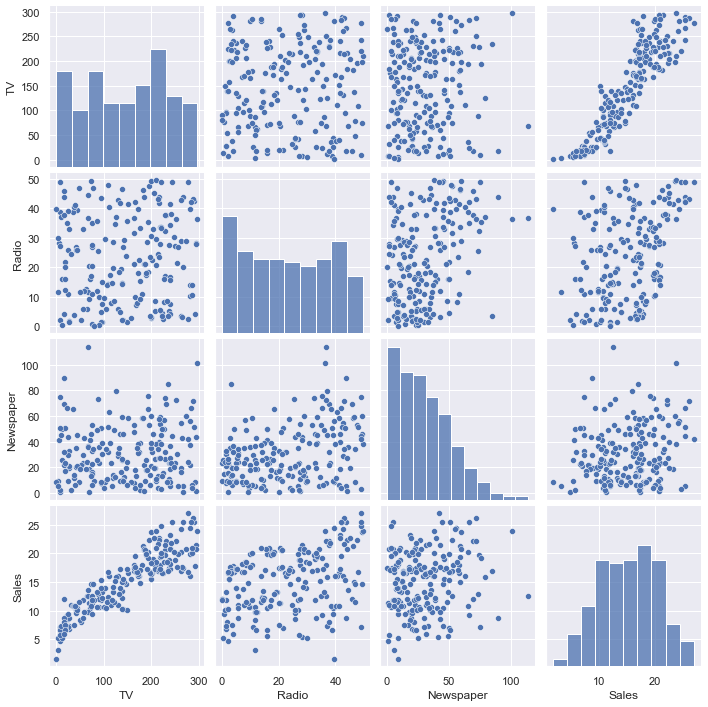

In [11]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data)

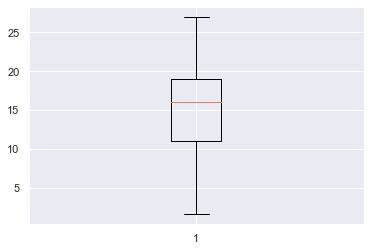

In [12]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Sales'])
plt.show()

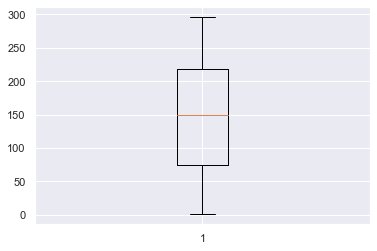

In [13]:
import matplotlib.pyplot as plt 
plt.boxplot(data['TV'])
plt.show()

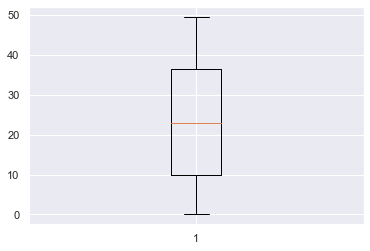

In [14]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Radio'])
plt.show()

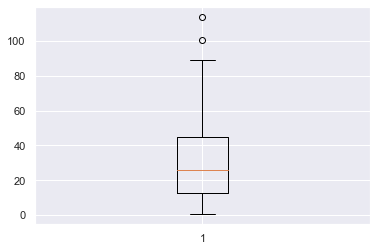

In [15]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Newspaper'])
plt.show()

In [16]:
data.corr()  # to create a correlation matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

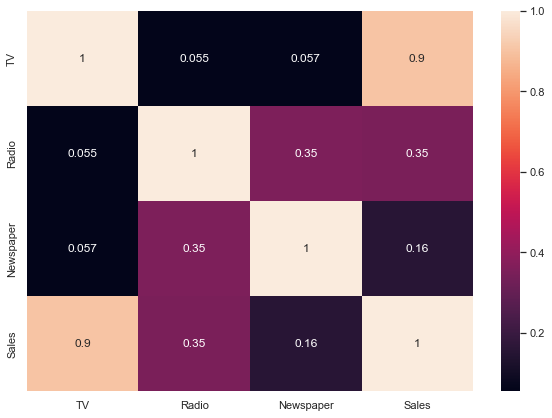

In [17]:
plt.figure(figsize=(10,7)) # to create a correlation heatmap
sns.heatmap(data.corr(), annot =True)

#  Multivariate Linear Regression on Advertising Data 

In [18]:
x = data[['TV', 'Newspaper', 'Radio']]
y = data['Sales']


In [19]:
from sklearn.linear_model import LinearRegression # importing the model

In [20]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9025912899684558

In [21]:
from sklearn.model_selection import train_test_split # to split data into train set and test set 

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 1)

In [23]:
x_train.size

402

In [24]:
x_test.size

198

In [25]:
model.fit(x_train,y_train) 
model.intercept_.round(3) # to chech estimated intercept from model 

4.75

In [26]:
model.coef_.round(3) # to check the coefficients of the features

array([ 0.055, -0.003,  0.106])

In [27]:
ytest_pred = model.predict(x_test)
ytest_pred.size


66

In [28]:
x_test.size

198

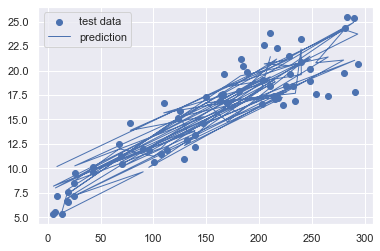

In [29]:
plt.scatter(x_test['TV'],y_test, label ='test data');
plt.plot(x_test['TV'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()


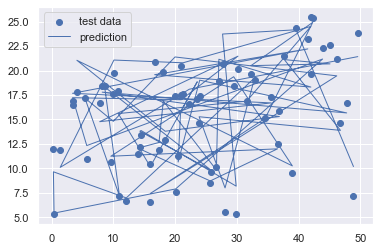

In [30]:
plt.scatter(x_test['Radio'],y_test, label ='test data');
plt.plot(x_test['Radio'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

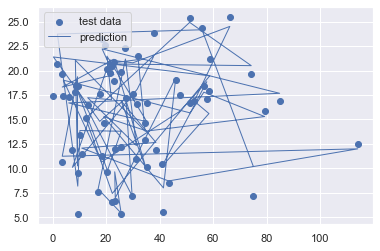

In [31]:
plt.scatter(x_test['Newspaper'],y_test, label ='test data');
plt.plot(x_test['Newspaper'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [32]:
residuals = y_test - ytest_pred
residuals.head()

58     2.374958
40    -1.491815
34     1.792626
102   -1.274508
184   -3.194635
Name: Sales, dtype: float64

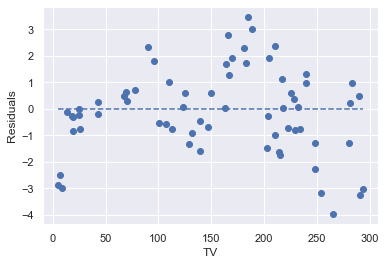

In [33]:
plt.scatter(x_test['TV'], residuals)
plt.hlines(y=0, xmin= x_test['TV'].min(), xmax= x_test['TV'].max(), linestyle ='--')

plt.xlabel('TV')
plt.ylabel('Residuals')
plt.show()

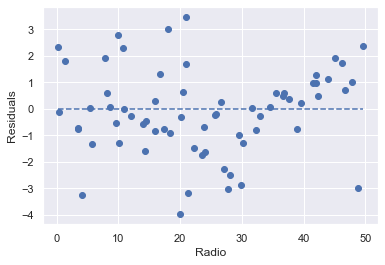

In [34]:
plt.scatter(x_test['Radio'], residuals)
plt.hlines(y=0, xmin= x_test['Radio'].min(), xmax= x_test['Radio'].max(), linestyle ='--')

plt.xlabel('Radio')
plt.ylabel('Residuals')
plt.show()

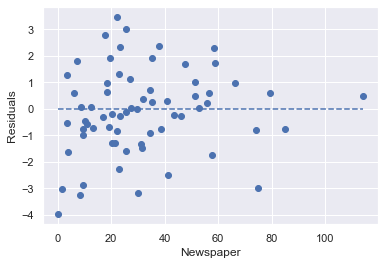

In [35]:
plt.scatter(x_test['Newspaper'], residuals)
plt.hlines(y=0, xmin= x_test['Newspaper'].min(), xmax= x_test['Newspaper'].max(), linestyle ='--')

plt.xlabel('Newspaper')
plt.ylabel('Residuals')
plt.show()

In [36]:
residuals.mean() # to get the average of all residuals

-0.10689583385314495

In [37]:
(residuals**2).mean() # to get the mean squared error or 

2.5676842539920304

In [38]:
from sklearn.metrics import mean_squared_error # use this method 
mean_squared_error (y_test,ytest_pred)

2.567684253992031

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

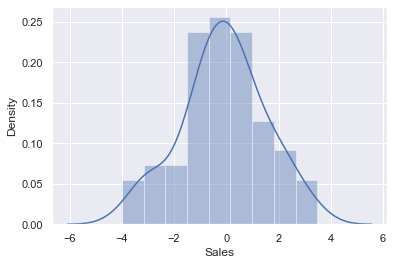

In [39]:
sns.distplot((y_test-ytest_pred)) # to check if errors are normally distributed

# Kindly upvote if you like it and recommend me for jobs 

**Thank you**